In [1]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_context('notebook', font_scale=2)

In [2]:
import visual_behavior.ophys.response_analysis.utilities as ut
colors = ut.get_colors_for_image_sets()

In [3]:
model_dir = '/home/a/Документы/STSPNet/RESULT/'

In [4]:
from visual_behavior.ophys.response_analysis.utilities import get_mean_df

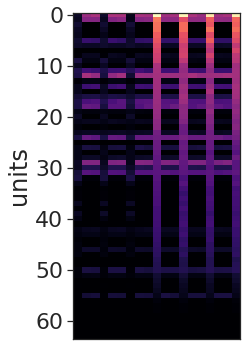

In [5]:
model_data = pickle.load(open(model_dir+'STPNetWithSpikes'+'/STPNetWithSpikes_A_1.pkl', 'rb'))
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']
image = model_data['image']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

sns.set_style({'xtick.bottom': True, 'ytick.left': True,})
plt.figure(figsize=(3,6))
plt.imshow(go_trial[idx,:], vmin=0, vmax=go_trial[idx,:].max(), cmap='magma', aspect='auto')  # 0.75)  # input_act[0].transpose()[:, 12:], aspect='auto')
# plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))
plt.xticks([])
plt.ylabel('units')
# plt.xlabel('time after change (s)')

plt.savefig('/home/a/Документы/STSPNet/compare/example_stsp_population_response.png', dpi=300, bbox_inches='tight')

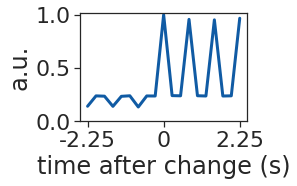

In [6]:
fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[1], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), color=colors[1], linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')

fig.savefig('/home/a/Документы/STSPNet/compare/stsp_response_psth.png', dpi=300, bbox_inches='tight')

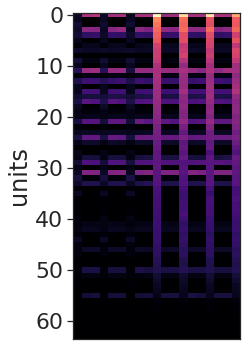

In [8]:
# model_data = pickle.load(open(results_path+'RNN'+'/omit/image_set_A/RNN_A_1.pkl'))
model_data = pickle.load(open(model_dir+'RNN'+'/RNN_A_1.pkl', 'rb'))
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

sns.set_style({'xtick.bottom': True, 'ytick.left': True,})
plt.figure(figsize=(3,6))
# Note: vmax=6 before on SfN poster
plt.imshow(go_trial[idx, :], vmin=0, vmax=go_trial[idx,:].max(), cmap='magma', aspect='auto')  # input_act[0].transpose()[:, 12:], aspect='auto')
# plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

plt.xticks([])
plt.ylabel('units')
# plt.xlabel('time after change (s)')

plt.savefig('/home/a/Документы/STSPNet/compare/example_rnn_population_response.png', dpi=300, bbox_inches='tight')

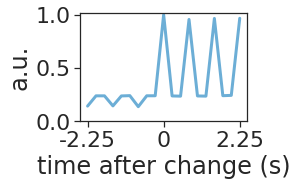

In [9]:
fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[3], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), color=colors[3], linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')

fig.savefig('/home/a/Документы/STSPNet/compare/rnn_response_psth.png', dpi=300, bbox_inches='tight')

In [46]:
stsp_inp_array = []
stspwithspikes_inp_array = []
rnn_inp_array = []
for model in ['STPNet', 'STPNetWithSpikes', 'RNN']:
    for seed in range(1,11):
        directory = model_dir+model+'/'+model+'_A_'+str(seed)+'.pkl'

        model_data = pickle.load(open(directory, 'rb'))
        
        # get necessary items
        image = model_data['image']
        label = model_data['labels'].squeeze()
        input_act = model_data['input']  # hidden']
        
#         # use go and catch images
#         mean_inp_act_go = input_act[(label==1)].mean(axis=0)
#         mean_inp_act_catch = input_act[(label==-1)].mean(axis=0)
        
        # use change and pre-change images
        idx = np.argwhere(label==1)
        mean_inp_act_go = input_act[idx[:,0], idx[:,1]].mean(axis=0)
        mean_inp_act_catch = input_act[idx[:,0], idx[:,1]-3].mean(axis=0)
        
        if model == 'STPNet':
            stsp_inp_array.append((mean_inp_act_go, mean_inp_act_catch))
        elif model == 'STPNetWithSpikes':
            stspwithspikes_inp_array.append((mean_inp_act_go, mean_inp_act_catch))
        else:
            rnn_inp_array.append((mean_inp_act_go, mean_inp_act_catch))

In [47]:
stsp_input_go = np.stack([m[0] for m in stsp_inp_array]).flatten()
stsp_input_catch = np.stack([m[1] for m in stsp_inp_array]).flatten()

stspwithspikes_input_go = np.stack([m[0] for m in stspwithspikes_inp_array]).flatten()
stspwithspikes_input_catch = np.stack([m[1] for m in stspwithspikes_inp_array]).flatten()

rnn_input_go = np.stack([m[0] for m in rnn_inp_array]).flatten()
rnn_input_catch = np.stack([m[1] for m in rnn_inp_array]).flatten()

In [48]:
adaptation_index_stsp = (stsp_input_go - stsp_input_catch) / (stsp_input_go + stsp_input_catch)
adaptation_index_stsp_spikes = (stspwithspikes_input_go - stspwithspikes_input_catch) / (stspwithspikes_input_go + stspwithspikes_input_catch)
adaptation_index_rnn = (rnn_input_go - rnn_input_catch) / (rnn_input_go + rnn_input_catch)

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
adaptation_index_rnn = adaptation_index_rnn[~np.isnan(adaptation_index_rnn)]
adaptation_index_stsp = adaptation_index_stsp[~np.isnan(adaptation_index_stsp)]
adaptation_index_stsp_spikes = adaptation_index_stsp_spikes[~np.isnan(adaptation_index_stsp_spikes)]

In [44]:
np.mean(adaptation_index_stsp), np.mean(adaptation_index_stsp_spikes), np.mean(adaptation_index_rnn)

(-0.001349775, -0.001349775, -0.00082736544)

In [49]:
import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_style({'axes.spines.right': False, 'axes.spines.top': False})
sns.set_context('notebook', font_scale=2)

Text(-0.001349775, 555.5555555555555, '')

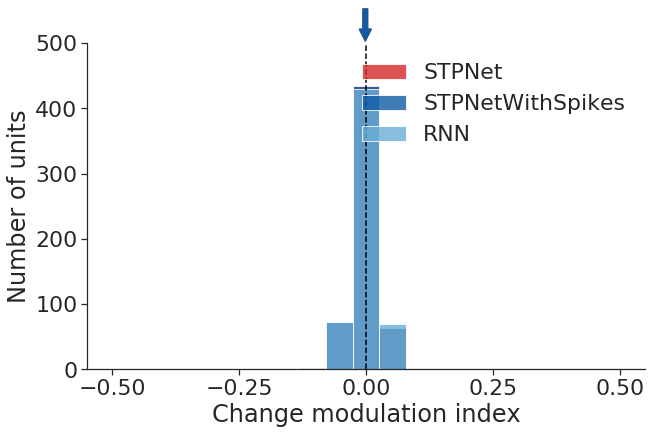

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

# useful for filtering hidden cells (with lots of nans)
adaptation_index_rnn = adaptation_index_rnn[~np.isnan(adaptation_index_rnn)]
adaptation_index_stsp = adaptation_index_stsp[~np.isnan(adaptation_index_stsp)]
adaptation_index_stsp_spikes = adaptation_index_stsp_spikes[~np.isnan(adaptation_index_stsp_spikes)]


# plt.hist(adaptation_index_rnn, bins=np.linspace(-0.4, 0.4, 20), color=colors[3], alpha=0.8, label='RNN')
# plt.hist(adaptation_index_stsp, bins=np.linspace(-0.4, 0.4, 20), color=colors[1], alpha=0.8, label='STSPNet')

# ax.hist(adaptation_index_rnn, bins=np.linspace(-1, 1, 20), color=colors[3], alpha=0.8, label='RNN')
# ax.hist(adaptation_index_stsp, bins=np.linspace(-1, 1, 20), color=colors[1], alpha=0.8, label='STSPNet')
ax.hist(adaptation_index_stsp, bins=np.linspace(-0.5, 0.5, 20), color=colors[0], alpha=0.8, label='STPNet')
ax.hist(adaptation_index_stsp_spikes, bins=np.linspace(-0.5, 0.5, 20), color=colors[1], alpha=0.8, label='STPNetWithSpikes')
ax.hist(adaptation_index_rnn, bins=np.linspace(-0.5, 0.5, 20), color=colors[3], alpha=0.8, label='RNN')
# ax.hist(adaptation_index_rnn, bins=np.linspace(-0.5, 0.5, 20), color=colors[3], alpha=0.8, label='RNN')
ax.axvline(0.0, color='k', linestyle='--')
# ax.set_xlim([-0.6, 0.6])  # 100])
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])  # 100])
ax.set_ylim([0, 500])  # 100])
# plt.axvline(np.nanmean(adaptation_index_rnn))
# plt.axvline(np.nanmean(adaptation_index_stsp))
ax.set_xlabel('Change modulation index')
ax.set_ylabel('Number of units')
ax.legend(frameon=False)

# NOTE: bars were originally set at 600
# # annotate
# ax.annotate("",
#             xy=(np.nanmean(adaptation_index_rnn), 300), xycoords='data',
#             xytext=(np.nanmean(adaptation_index_rnn), 333.33), textcoords='data',
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3",
#                             color=colors[3]),
#             )
# ax.annotate("",
#             xy=(np.nanmean(adaptation_index_stsp),300), xycoords='data',
#             xytext=(np.nanmean(adaptation_index_stsp), 333.33), textcoords='data',
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3",
#                             color=colors[1]),
#             )

# annotate
ax.annotate("",
            xy=(np.nanmean(adaptation_index_rnn), 500), xycoords='data',
            xytext=(np.nanmean(adaptation_index_rnn), (10./9)*500), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[3]),
            )
ax.annotate("",
            xy=(np.nanmean(adaptation_index_stsp), 500), xycoords='data',
            xytext=(np.nanmean(adaptation_index_stsp), (10./9)*500), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[0]),
            )
ax.annotate("",
            xy=(np.nanmean(adaptation_index_stsp_spikes), 500), xycoords='data',
            xytext=(np.nanmean(adaptation_index_stsp_spikes), (10./9)*500), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3",
                            color=colors[1]),
            )


plt.savefig('figures/adaptation_index_model_new_v2.png', dpi=300, bbox_inches='tight')